In [1]:
import numpy as np             
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns          
import sklearn  
import pickle

C:\Users\aging\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


# Классификация рака

Проведение классификации пациентов по типу рака на основе уровня метилирования ДНК (бета-значений).

## 1. Загрузка данных

Загрузим два файла. Первый файл содержит информацию о клинических данных пациентов. Второй файл содежит в себе данные бета-значений CpG сайтов каждого пациента.  

### Загрузка клинических данных

Таблица содержит клинические данные 9748 пациентов. Для каждого пациента есть информация о возрасте, расе, гендере, статусе, тип рака и др. 

In [51]:
dfDataClinic = pd.DataFrame()
fnameDataClinic = 'D:/Nerobova_Anastasiya/ML/InfoClinicData.pkl'

with open(fnameDataClinic, 'rb') as handle:
    dfDataClinic = pickle.load(handle)

dfDataClinic.head()

,id_person,days_to_birth,days_to_last_followup,race_list,icd_10,other_dx,icd_o_3_site,icd_o_3_histology,vital_status,project,...,bcr_patient_barcode,additional_studies,year_of_form_completion,history_of_neoadjuvant_treatment,tissue_source_site,has_drugs_information,has_follow_ups_information,ethnicity,bcr_patient_uuid,patient_id
0,TCGA-OR-A5LH-01A-11D-A29J-05,-13182.0,NaN,WHITE,C74.0,No,C74.0,8370/3,Dead,TCGA-ACC,...,TCGA-OR-A5LH,NaN,2013,No,OR,NO,NO,NOT HISPANIC OR LATINO,CF327482-199B-4604-AC19-C8B68D91C5D9,A5LH
1,TCGA-OR-A5LG-01A-11D-A29J-05,-16875.0,1589.0,WHITE,C74.0,No,C74.0,8370/3,Alive,TCGA-ACC,...,TCGA-OR-A5LG,NaN,2013,No,OR,NO,NO,NOT HISPANIC OR LATINO,FAD4B7E6-510C-4968-83DF-3140ED5A0549,A5LG
2,TCGA-OR-A5JQ-01A-11D-A29J-05,-9667.0,674.0,WHITE,C74.0,No,C74.0,8370/3,Alive,TCGA-ACC,...,TCGA-OR-A5JQ,NaN,2013,No,OR,NO,YES,NaN,199560CB-15E5-4276-865A-7D44D47C856C,A5JQ
3,TCGA-OR-A5J6-01A-31D-A29J-05,-10839.0,2428.0,BLACK OR AFRICAN AMERICAN,C74.0,No,C74.0,8370/3,Alive,TCGA-ACC,...,TCGA-OR-A5J6,NaN,2013,No,OR,NO,YES,HISPANIC OR LATINO,C8898B42-B704-45A0-9829-144B98F416E0,A5J6
4,TCGA-OR-A5L6-01A-11D-A29J-05,-22057.0,628.0,WHITE,C74.0,No,C74.0,8370/3,Alive,TCGA-ACC,...,TCGA-OR-A5L6,NaN,2013,No,OR,NO,YES,NOT HISPANIC OR LATINO,F13A3D5E-7F8E-4ACB-AD46-F6380A9443E8,A5L6


Каждая строка соответствует пациенту, а каждый столбец соответствует конкретной характеристике:

In [4]:
dfDataClinic.shape

(9748, 26)

In [5]:
dfDataClinic.columns

Index(['id_person', 'days_to_birth', 'days_to_last_followup', 'race_list',
       'icd_10', 'other_dx', 'icd_o_3_site', 'icd_o_3_histology',
       'vital_status', 'project', 'day_of_form_completion', 'gender',
       'has_radiations_information', 'days_to_death',
       'informed_consent_verified', 'month_of_form_completion',
       'bcr_patient_barcode', 'additional_studies', 'year_of_form_completion',
       'history_of_neoadjuvant_treatment', 'tissue_source_site',
       'has_drugs_information', 'has_follow_ups_information', 'ethnicity',
       'bcr_patient_uuid', 'patient_id'],
      dtype='object')

Характеристики: 

 - id_person - id пациента в таблице
 - days_to_birth - дней до дня рождения
 - days_to_last_followup - дней до последнего наблюдения
 - race_list - раса пациента
 - icd_10 - международная статистическая классификация болезней
 - other_dx - иная информация
 - icd_o_3_site - Международная классификация онкологических заболеваний (ICD-O) (сайт)
 - icd_o_3_histolog - Международная классификация онкологических заболеваний (ICD-O) (гистология)
 - vital_status - жизненный статус
 - project - тип рака пациента
 - gender - гендер
 - has_radiations_information - была ли лучевая (радио-) терапия
 - days_to_death - дней до смерти
 - informed_consent_verified - согласие подтверждено 
 - day_of_form_completion - день заполнения формы
 - month_of_form_completion - месяц заполнения формы
 - year_of_form_completion - год заполнения формы
 - bcr_patient_barcode - сокращенный id пациента
 - additional_studies - дополнительные исследования
 - history_of_neoadjuvant_treatment - история неоадъювантного лечения (хим терапия)
 - tissue_source_site - сайт источника ткани
 - has_drugs_information - есть ли информация о принимаемых лекарственных средств
 - has_follow_ups_information - есть последующая информация (о пациенте)
 - ethnicity - этническая принадлежность
 - patient_id - id пацента внутри типа рака
 

Посмотрим, какой тип данных имеет каждая характеристика.

In [9]:
dfDataClinic.dtypes

id_person                            object
days_to_birth                       float64
days_to_last_followup               float64
race_list                            object
icd_10                               object
other_dx                             object
icd_o_3_site                         object
icd_o_3_histology                    object
vital_status                         object
project                              object
day_of_form_completion              float64
gender                               object
has_radiations_information           object
days_to_death                       float64
informed_consent_verified            object
month_of_form_completion              int64
bcr_patient_barcode                  object
additional_studies                   object
year_of_form_completion               int64
history_of_neoadjuvant_treatment     object
tissue_source_site                   object
has_drugs_information                object
has_follow_ups_information      

### Загрузка данных бета-значений 

Бета-значения - доля метилированных сайтов. Метилирование ДНК заключается в присоединении метильной группы к цитозину в составе CpG-динуклеотида в позиции С5 цитозинового кольца.

In [4]:
dfDataBeta = pd.DataFrame()
fnameDataBeta = 'D:/Nerobova_Anastasiya/RStudio/MatrixCpGAllCancer.pkl'

with open(fnameDataBeta, 'rb') as handle:
    dfDataBeta = pickle.load(handle)

dfDataBeta.head()

CpG,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
TCGA-OR-A5LH-01A-11D-A29J-05,0.127235,NaN,NaN,0.798976,0.906222,0.724104,0.406815,0.202612,0.151666,0.013125,...,0.791231,0.014351,0.123524,0.971234,0.522766,0.051763,0.861380,0.307426,0.119247,0.941517
TCGA-OR-A5LG-01A-11D-A29J-05,0.046121,NaN,NaN,0.067993,0.893865,0.754962,0.857653,0.865786,0.560898,0.013004,...,0.461214,0.013948,0.900690,0.976762,0.017721,0.606996,0.972568,0.030855,0.072948,0.669205
TCGA-OR-A5JQ-01A-11D-A29J-05,0.602064,NaN,NaN,0.100943,0.897362,0.614677,0.877027,0.255339,0.714194,0.014641,...,0.020769,0.013826,0.909073,0.256746,0.969041,0.249980,0.512725,0.354050,0.152047,0.942741
TCGA-OR-A5J6-01A-31D-A29J-05,0.117144,NaN,NaN,0.115994,0.413085,0.584756,0.782867,0.825748,0.123553,0.013132,...,0.469062,0.973064,0.912584,0.436507,0.445958,0.546527,0.676457,0.040208,0.938875,0.137452
TCGA-OR-A5L6-01A-11D-A29J-05,0.264575,NaN,NaN,0.143594,0.892213,0.717910,0.834388,0.862202,0.881404,0.014424,...,0.968430,0.015532,0.896062,0.014142,0.459246,0.935251,0.030863,0.030264,0.056576,0.905967


Каждая строка в таблице соответствует пациенту, а каждый столбец соответствует конкретному CpG сайту

In [8]:
dfDataBeta.shape

(9748, 485577)

Т.к. признаков очень много (485577), необходимо сделать уменьшение размерности (или редукцию размерности)

## 2. Визуализация данных и вычисление основых характеристик

In [21]:
dfDataClinic.describe()

,days_to_birth,days_to_last_followup,day_of_form_completion,days_to_death,month_of_form_completion,year_of_form_completion
count,9644.000000,7724.000000,9694.000000,2113.000000,9748.000000,9748.000000
mean,-21656.138013,688.611082,15.374768,849.779934,6.060936,2012.283135
std,5358.419826,954.419878,8.473379,979.943274,3.360184,1.311789
min,-32873.000000,-64.000000,1.000000,0.000000,1.000000,2008.000000
25%,-25582.000000,89.000000,8.000000,233.000000,3.000000,2011.000000
50%,-22203.500000,305.000000,14.000000,522.000000,6.000000,2012.000000
75%,-18363.750000,935.250000,22.000000,1111.000000,9.000000,2014.000000
max,-5267.000000,10860.000000,31.000000,10870.000000,12.000000,2015.000000


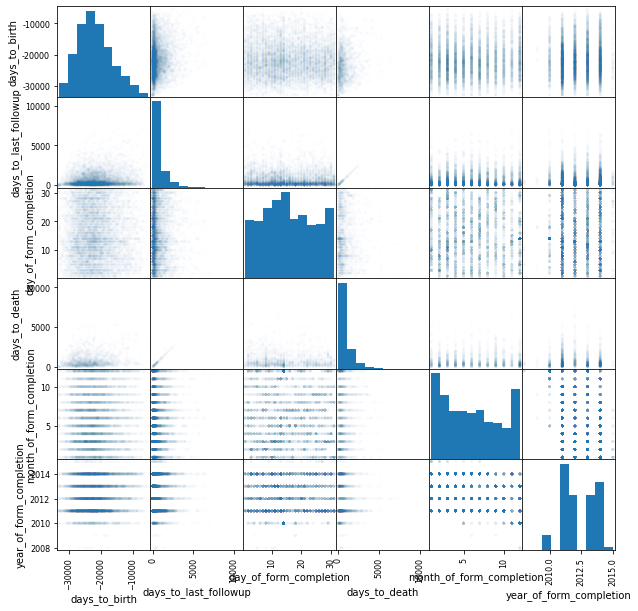

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfDataClinic, alpha = .01, figsize = (10, 10))
pass

In [23]:
dfDataClinic.corr()

,days_to_birth,days_to_last_followup,day_of_form_completion,days_to_death,month_of_form_completion,year_of_form_completion
days_to_birth,1.000000,0.139069,-0.022274,0.196043,0.033291,0.061897
days_to_last_followup,0.139069,1.000000,-0.023240,0.894456,0.037907,0.029254
day_of_form_completion,-0.022274,-0.023240,1.000000,-0.050192,-0.025716,0.022728
days_to_death,0.196043,0.894456,-0.050192,1.000000,0.029728,-0.027346
month_of_form_completion,0.033291,0.037907,-0.025716,0.029728,1.000000,-0.230340
year_of_form_completion,0.061897,0.029254,0.022728,-0.027346,-0.230340,1.000000


In [ ]:
Как можно увидеть, корреляция 

In [10]:
dfDataClinic.describe(include = ['object'])

,id_person,race_list,icd_10,other_dx,icd_o_3_site,icd_o_3_histology,vital_status,project,gender,has_radiations_information,informed_consent_verified,bcr_patient_barcode,additional_studies,history_of_neoadjuvant_treatment,tissue_source_site,has_drugs_information,has_follow_ups_information,ethnicity,bcr_patient_uuid,patient_id
count,9748,9144,9554,9615,9554,9554,9746,9748,9748,9748,9748,9748,63,9745,9741,9748,9748,8067,9748,9748
unique,9748,5,163,4,152,136,2,32,2,2,1,8888,1,4,692,2,2,2,8888,8888
top,TCGA-FK-A3SD-01A-11D-A22G-05,WHITE,C50.9,No,C50.9,8140/3,Alive,TCGA-BRCA,MALE,NO,YES,TCGA-BK-A139,TCGAFPPP,No,AB,NO,YES,NOT HISPANIC OR LATINO,49929108-023e-4d35-b26d-50ab4d3ae581,5645
freq,1,7567,893,8714,893,1255,7605,894,5028,6901,9748,4,63,9605,194,6430,8293,7707,4,4


In [11]:
dfDataClinic.describe(include = 'all')

,id_person,days_to_birth,days_to_last_followup,race_list,icd_10,other_dx,icd_o_3_site,icd_o_3_histology,vital_status,project,...,bcr_patient_barcode,additional_studies,year_of_form_completion,history_of_neoadjuvant_treatment,tissue_source_site,has_drugs_information,has_follow_ups_information,ethnicity,bcr_patient_uuid,patient_id
count,9748,9644.000000,7724.000000,9144,9554,9615,9554,9554,9746,9748,...,9748,63,9748.000000,9745,9741,9748,9748,8067,9748,9748
unique,9748,NaN,NaN,5,163,4,152,136,2,32,...,8888,1,NaN,4,692,2,2,2,8888,8888
top,TCGA-FK-A3SD-01A-11D-A22G-05,NaN,NaN,WHITE,C50.9,No,C50.9,8140/3,Alive,TCGA-BRCA,...,TCGA-BK-A139,TCGAFPPP,NaN,No,AB,NO,YES,NOT HISPANIC OR LATINO,49929108-023e-4d35-b26d-50ab4d3ae581,5645
freq,1,NaN,NaN,7567,893,8714,893,1255,7605,894,...,4,63,NaN,9605,194,6430,8293,7707,4,4
mean,NaN,-21656.138013,688.611082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2012.283135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5358.419826,954.419878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.311789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-32873.000000,-64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,-25582.000000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,-22203.500000,305.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,-18363.750000,935.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dfDataClinic['gender'].value_counts()

MALE      5028
FEMALE    4720
Name: gender, dtype: int64

In [13]:
dfDataClinic['race_list'].value_counts()

WHITE                                        7567
BLACK OR AFRICAN AMERICAN                     930
ASIAN                                         614
AMERICAN INDIAN OR ALASKA NATIVE               23
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      10
Name: race_list, dtype: int64

In [14]:
dfDataClinic['project'].value_counts()

TCGA-BRCA    894
TCGA-HNSC    580
TCGA-THCA    571
TCGA-PRAD    552
TCGA-LGG     533
TCGA-LUAD    507
TCGA-KIRC    485
TCGA-SKCM    475
TCGA-UCEC    473
TCGA-BLCA    440
TCGA-LIHC    414
TCGA-LUSC    412
TCGA-STAD    397
TCGA-COAD    351
TCGA-KIRP    321
TCGA-CESC    312
TCGA-SARC    269
TCGA-ESCA    202
TCGA-PAAD    195
TCGA-LAML    194
TCGA-PCPG    187
TCGA-GBM     152
TCGA-TGCT    139
TCGA-THYM    126
TCGA-READ    105
TCGA-MESO     87
TCGA-UVM      80
TCGA-ACC      80
TCGA-KICH     66
TCGA-UCS      57
TCGA-DLBC     47
TCGA-CHOL     45
Name: project, dtype: int64

In [13]:
dfDataClinic['vital_status'].value_counts() 

Alive    7605
Dead     2141
Name: vital_status, dtype: int64

## 3. Обработка пропущенных значений

Проверим, есть ли пропущенные значения в таблице с ___клиническими данными___.

In [24]:
dfDataClinic.median(axis = 0)

days_to_birth              -22203.5
days_to_last_followup         305.0
day_of_form_completion         14.0
days_to_death                 522.0
month_of_form_completion        6.0
year_of_form_completion      2012.0
dtype: float64

In [25]:
dfDataClinic.isna().sum()  

id_person                              0
days_to_birth                        104
days_to_last_followup               2024
race_list                            604
icd_10                               194
other_dx                             133
icd_o_3_site                         194
icd_o_3_histology                    194
vital_status                           2
project                                0
day_of_form_completion                54
gender                                 0
has_radiations_information             0
days_to_death                       7635
informed_consent_verified              0
month_of_form_completion               0
bcr_patient_barcode                    0
additional_studies                  9685
year_of_form_completion                0
history_of_neoadjuvant_treatment       3
tissue_source_site                     7
has_drugs_information                  0
has_follow_ups_information             0
ethnicity                           1681
bcr_patient_uuid

In [27]:
dfDataClinic.fillna(dfDataClinic.median(axis = 0), axis=0 , inplace=True)
dfDataClinic.isna().sum()  

id_person                              0
days_to_birth                          0
days_to_last_followup                  0
race_list                            604
icd_10                               194
other_dx                             133
icd_o_3_site                         194
icd_o_3_histology                    194
vital_status                           2
project                                0
day_of_form_completion                 0
gender                                 0
has_radiations_information             0
days_to_death                          0
informed_consent_verified              0
month_of_form_completion               0
bcr_patient_barcode                    0
additional_studies                  9685
year_of_form_completion                0
history_of_neoadjuvant_treatment       3
tissue_source_site                     7
has_drugs_information                  0
has_follow_ups_information             0
ethnicity                           1681
bcr_patient_uuid

Т.к. такие характеристики как ... не имеют еще .... Заполнять медианой не имеет смысла. Да и в дальнейшем изучении пока не требуются, оставим значения пустыми.

Теперь проверим, есть ли пропущенные значения в таблице с ___бета-значениями___.

In [4]:
sumNan = dfDataBeta.isna().sum()
print(sumNan)

CpG
cg00000029       2
cg00000108    9748
cg00000109    9748
cg00000165       0
cg00000236       1
              ... 
rs9363764        0
rs939290         0
rs951295         0
rs966367         0
rs9839873        0
Length: 485577, dtype: int64


Видим, что такие CpG сайты как cg00000108, cg00000109 у всех пациентов пустые. Найдем все такие CpG сайты и уберем их из рассмотрения.

In [5]:
columns = dfDataBeta.columns

In [6]:
num_bord = 7311
columnNan = []
for column in columns:
    if sumNan[column] > num_bord:
        columnNan.append(column)
        
#print(columnNan)

In [11]:
len(columnNan)

89512

In [7]:
dfDataBeta = dfDataBeta.drop(columnNan, axis = 1)

In [8]:
dfDataBeta.fillna(dfDataBeta.median(axis = 0), axis=0 , inplace=True)

In [10]:
dfDataBeta.isna().sum()

CpG
cg00000029   NaN
cg00000165   NaN
cg00000236   NaN
cg00000289   NaN
cg00000292   NaN
              ..
rs9363764    NaN
rs939290     NaN
rs951295     NaN
rs966367     NaN
rs9839873    NaN
Length: 396065, dtype: float64

## 4. Предобработка данных 

В рамках данной задачи исследуется зависимость бета-значений от типа рака. Остальные характеристики из таблицы с клиническими данными пока не требуется. Поэтому для дальнейшего анализа сделаем преобрабтку данных, а именно для каждого пациента совместим  последовательность бета-значений с его типом рака.

In [2]:
dfDataBeta = pd.read_pickle('D:/Nerobova_Anastasiya/RStudio/MatrixBetaNoNan.pkl')

dfDataBeta.head()

CpG,cg00000029,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,cg00000658,cg00000714,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
TCGA-OR-A5LH-01A-11D-A29J-05,0.127235,0.798976,0.906222,0.724104,0.406815,0.202612,0.151666,0.013125,0.832441,0.140646,...,0.791231,0.014351,0.123524,0.971234,0.522766,0.051763,0.861380,0.307426,0.119247,0.941517
TCGA-OR-A5LG-01A-11D-A29J-05,0.046121,0.067993,0.893865,0.754962,0.857653,0.865786,0.560898,0.013004,0.809210,0.070986,...,0.461214,0.013948,0.900690,0.976762,0.017721,0.606996,0.972568,0.030855,0.072948,0.669205
TCGA-OR-A5JQ-01A-11D-A29J-05,0.602064,0.100943,0.897362,0.614677,0.877027,0.255339,0.714194,0.014641,0.814129,0.118062,...,0.020769,0.013826,0.909073,0.256746,0.969041,0.249980,0.512725,0.354050,0.152047,0.942741
TCGA-OR-A5J6-01A-31D-A29J-05,0.117144,0.115994,0.413085,0.584756,0.782867,0.825748,0.123553,0.013132,0.790851,0.060101,...,0.469062,0.973064,0.912584,0.436507,0.445958,0.546527,0.676457,0.040208,0.938875,0.137452
TCGA-OR-A5L6-01A-11D-A29J-05,0.264575,0.143594,0.892213,0.717910,0.834388,0.862202,0.881404,0.014424,0.812025,0.131322,...,0.968430,0.015532,0.896062,0.014142,0.459246,0.935251,0.030863,0.030264,0.056576,0.905967


Перед слиянием проверим, совпадают ли строки таблицы бета-значений и клинических данных.

In [14]:
print(list(dfDataBeta.index.values) == list(dfDataClinic['id_person']))

True


In [13]:
pd.concat([dfDataBeta, dfDataClinic['project']], axis=1, copy=False).to_pickle('D:/Nerobova_Anastasiya/ML/Data.pkl')

In [2]:
dfData = pd.read_pickle('D:/Nerobova_Anastasiya/ML/Data.pkl')

У некоторых типов рака людей слишком мало, чтобы хорошо обучить сеть. Поэтому оставим те типы рака, где количество человек болше 200.

Посмотрим, сколько людей болеют тем или иным типом рака:

In [5]:
columnСancer = dfData['project'].value_counts()
print(columnСancer)

TCGA-BRCA    894
TCGA-HNSC    580
TCGA-THCA    571
TCGA-PRAD    552
TCGA-LGG     533
TCGA-LUAD    507
TCGA-KIRC    485
TCGA-SKCM    475
TCGA-UCEC    473
TCGA-BLCA    440
TCGA-LIHC    414
TCGA-LUSC    412
TCGA-STAD    397
TCGA-COAD    351
TCGA-KIRP    321
TCGA-CESC    312
TCGA-SARC    269
TCGA-ESCA    202
Name: project, dtype: int64


In [6]:
columns = dfData['project'].unique()

num_bord = 200
columnСancerBed = []
columnСancerUp = []
for column in columns:
    if columnСancer[column] < num_bord:
        columnСancerBed.append(column)
    else:
        columnСancerUp.append(column)


Оставшиеся типы рака:

In [7]:
columnСancerUp

['TCGA-BLCA',
 'TCGA-BRCA',
 'TCGA-CESC',
 'TCGA-COAD',
 'TCGA-ESCA',
 'TCGA-HNSC',
 'TCGA-KIRC',
 'TCGA-KIRP',
 'TCGA-LGG',
 'TCGA-LIHC',
 'TCGA-LUAD',
 'TCGA-LUSC',
 'TCGA-PRAD',
 'TCGA-SARC',
 'TCGA-SKCM',
 'TCGA-STAD',
 'TCGA-THCA',
 'TCGA-UCEC']

Удалим людей, чей тип рака не принадлежит списку выше.

In [8]:
list_index_delete = []
for index in dfData.index:
    if dfData['project'][index] in columnСancerBed:
        list_index_delete.append(index)
dfData.drop(list_index_delete, inplace = True)

In [9]:
dfData.shape

(8188, 396066)

In [11]:
dfData.to_pickle('D:/Nerobova_Anastasiya/ML/DataBetaColumn.pkl')

## 5. Обработка категориальных признаков

Признаки в нашй задаче - последовательность бета-значений, которые могут принимать значения от 0 до 1 ( $\beta$ ∈ [0, 1] ), т.е. категориальных признаков нет.

Однако в таблице теперь присутсвует столбец project, который необхоимо преобразовать в метки. Каждый тип рака будет обозначаться целочисленным числом.

In [8]:
dfData['project'].unique()

array(['TCGA-BLCA', 'TCGA-BRCA', 'TCGA-CESC', 'TCGA-COAD', 'TCGA-ESCA',
       'TCGA-HNSC', 'TCGA-KIRC', 'TCGA-KIRP', 'TCGA-LGG', 'TCGA-LIHC',
       'TCGA-LUAD', 'TCGA-LUSC', 'TCGA-PRAD', 'TCGA-SARC', 'TCGA-SKCM',
       'TCGA-STAD', 'TCGA-THCA', 'TCGA-UCEC'], dtype=object)

In [9]:
columns = dfData['project'].unique()

dicСancerNum = {}

num = 0
for column in columns:
    dicСancerNum[column] = num
    num += 1

markerList = []
for column in list(dfData['project']):
    markerList.append(dicСancerNum[column])


dfData['project'] = dfData['project'].map(dicСancerNum).astype(int)


In [10]:
dicСancerNum

{'TCGA-BLCA': 0,
 'TCGA-BRCA': 1,
 'TCGA-CESC': 2,
 'TCGA-COAD': 3,
 'TCGA-ESCA': 4,
 'TCGA-HNSC': 5,
 'TCGA-KIRC': 6,
 'TCGA-KIRP': 7,
 'TCGA-LGG': 8,
 'TCGA-LIHC': 9,
 'TCGA-LUAD': 10,
 'TCGA-LUSC': 11,
 'TCGA-PRAD': 12,
 'TCGA-SARC': 13,
 'TCGA-SKCM': 14,
 'TCGA-STAD': 15,
 'TCGA-THCA': 16,
 'TCGA-UCEC': 17}

In [24]:
dfData['project'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

## 6. Нормализация данных

Данные метилирования ДНК (бета-значения) для CpG-сайтов были предварительно обработаны. В предварительную обработку уже входила нормализация данных. 

Подробнее:

Для получения и оценки возможных изменений уровня метилирования ДНК, были использованы чипы Illumina Infinium Human MethylationEPIC BeadChips 850K (EPIC), которые позволяют измерить уровень метилирования на более чем 850 тысячах (850K) CpG-сайтов. Illumina 850K сочетает в себе две разные технологии химического анализа. Infinium I использует два типа зондов (один для метилированного аллеля и один для неметилированного аллеля), но оба сигнала измеряются одним цветом (красным или зеленым). Infinium II использует один тип зонда для обоих аллелей, но метилированные и неметилированные сигналы измеряются зеленым и красным цветом соответственно. Для каждого локуса метилирования регистрируются два представляющих интерес сигнала. Один сигнал измеряет интенсивность метилированной ДНК (Meth), а другой сигнал измеряет интенсивность неметилированной ДНК (Unmeth). Эти значения интенсивности могут быть использованы для определения доли метилирования в каждом локусе CpG. 
Соотношение β=Meth / (Unmeth + Meth) — это коэффициент метилирования, называемый бета-значением в программном обеспечении Illumina, в популяции клеток, из которых извлекается ДНК


Данные, полученные с помощью чипа Illumina Infinium Human MethylationEPIC BeadChips 850K, имеют очень высокое качество. Но из-за того, что два химического состава (Infinium I и Infinium II) имеют разное динамическое поведение в анализе, необходима некоторая обработка данных, чтобы сделать их сопоставимыми. Важнейшими шагами являются: контроль качества для оценки качества набора данных после извлечения; фильтрация зондов для устранения вариаций сигнала, не связанных с различиями в метилировании ДНК или не связанных с биологическим контекстом исследования; коррекция сигнала для настройки цветового баланса и коррекции уровня фона; а также коррекция сдвига Infinium I / Infinium II и нормализация между выборками.

## 7. Разбивка данных на обучающую и тестовую выборки

In [2]:
dfData = pd.read_pickle('D:/Nerobova_Anastasiya/ML/DataBetaColumn.pkl')

In [3]:
X = dfData.drop('project', axis = 1)
y = dfData['project']

In [14]:
y

TCGA-2F-A9KO-01A-11D-A38H-05     0
TCGA-KQ-A41R-01A-21D-A34V-05     0
TCGA-UY-A9PA-01A-11D-A38H-05     0
TCGA-CF-A5UA-01A-11D-A28N-05     0
TCGA-E7-A7XN-01A-11D-A34V-05     0
                                ..
TCGA-B5-A11I-01A-11D-A10N-05    17
TCGA-QF-A5YT-01A-11D-A31V-05    17
TCGA-B5-A11S-01A-11D-A123-05    17
TCGA-B5-A0JX-01A-21D-A14N-05    17
TCGA-AX-A3FT-01A-11D-A22B-05    17
Name: project, Length: 8188, dtype: int32

In [15]:
X = X.to_numpy(dtype='float32')
y = np.array(y, dtype='int')

Удаление ненужных файлов.

In [4]:
del(dfData)

In [5]:
print(X.shape)
print(y.shape)
N, d = X.shape

(8188, 396065)
(8188,)


Разделим даннеы на обучающие и тестовые.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42,
                                                    stratify=y)

C:\Users\aging\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\aging\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

In [40]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [308 626 218 246 141 406 339 225 373 290 355 288 386 188 333 278 400 331]
Количество строк в y_test по классам: [132 268  94 105  61 174 146  96 160 124 152 124 166  81 142 119 171 142]


In [7]:
del(X)
del(y)

Обучим несколько моделей и сравним их эффективность.

In [9]:
from sklearn.tree import DecisionTreeClassifier

logreg_clf = DecisionTreeClassifier()
logreg_clf.fit(X_train, y_train)

C:\Users\aging\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
y_test_predict = logreg_clf.predict(X_test)
err_test = np.mean(y_test != y_test_predict)

In [12]:
print(err_test)

0.1461131461131461


In [15]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_predict, average='micro')

0.8538868538868539

In [16]:
f1_score(y_test, y_test_predict, average='macro')

0.8311226997195111

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
y_test_predict_gnb = gnb.predict(X_test)
err_test_gnb = np.mean(y_test != y_test_predict_gnb)

In [20]:
print(err_test_gnb)

0.11925111925111925


In [21]:
f1_score(y_test, y_test_predict_gnb, average='micro')

0.8807488807488808

Используя метод опорных векторов Jupyter несправлялся и вылетал.

In [ ]:
from sklearn.svm import SVC 

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)


Модель методом k-ближайших соседей обучается, но по неизвестной причине обрабатывает тестовые данные дольше, чем обучается. Парметры рассматривались разные.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1000)
knn.fit(X_train, y_train)

C:\Users\aging\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1000, p=2,
                     weights='uniform')

In [ ]:
y_test_predict_knn = knn.predict(X_test)

In [ ]:
err_test  = np.mean(y_test  != y_test_predict)

In [ ]:
predictions = model.predict(x_test_data)

In [14]:
model = KNeighborsClassifier(n_neighbors = 1)

In [15]:
model.fit(X_train, y_train)

C:\Users\aging\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
predictions = model.predict(X_test)

## 8. Вывод

Для исследования были загружены предварительно обработанные данные уровня метилирования ДНК (бета-значения) и данные характеристик пациентов для классикации рака в зависимости от бета-значений. Над данными была проведена дополнительная обработка, это проверка и удаление NaN, векторизация (обработка категориальных значений), нормализация. 

Далее данные были разделены на обучающие и тестовые выборки, а после были применены различные методы классфикации, вычисление ошибок и эффективности этих методов.

Были применены такие методы:
- Метод k-ближайших соседей (K-Nearest Neighbors). Модель обучалась, но тестовые данные обрабаотывала гораздо дольше, чем обучалась. Результаты так и не были получены.


- Классификатор дерева решений (Decision Tree Classifier). Ошибка метода: 0.1461131461131461. Эффективность: 0.8538868538868539

- Наивный байесовский классификатор (Naive Bayes). Ошибка метода: 0.11925111925111925. Эффективность: 0.8807488807488808.

- Метод опорных векторов (Support Vector Machines). На этапе обучения Jupyter выдавал ошибку.

На основе сработанных методов лучим является Наивный байесовский классификатор. Его ошибка меньше, а эффективность больше.